In [7]:


import itertools
from collections import Counter
import matplotlib.pyplot as plt

import sys
import os

# Add the parent directory of 'src' to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import ALL our helper functions
from src.data_loader import load_wiki_data, load_news_data
from src.preprocessor import preprocess_text

In [22]:
def analyze_and_plot(corpus_name: str, raw_corpus: str):
    """
    Takes a corpus, performs analysis, and generates four plots,
    including correctly scaled log-log Zipf's Law plots.
    """
    print(f"--- Analyzing Corpus: {corpus_name} ---")
    
    # --- Without Preprocessing ---
    raw_words = raw_corpus.lower().split()
    raw_word_counts = Counter(raw_words)
    top_20_raw = raw_word_counts.most_common(20)
    
    print(f"Top 20 raw words for {corpus_name}:")
    print(top_20_raw)
    
    # Plot 1: Top 20 Bar Chart (Before)
    words, counts = zip(*top_20_raw)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top 20 Words in {corpus_name} (Without Preprocessing)")
    plt.xticks(rotation=45)
    plt.show()

    # Plot 2: Zipf's Law Plot (Before) - CORRECTED with log-log scale
    count_of_word_counts = Counter(raw_word_counts.values())
    x = sorted(count_of_word_counts.keys())
    y = [count_of_word_counts[k] for k in x]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker=".", linestyle="-")
    plt.xscale("log")
    # plt.yscale("log") # <-- This ensures the y-axis is also logarithmic
    plt.xlabel("Word Frequency (log scale)")
    plt.ylabel("Number of Words with that Frequency")
    plt.title(f"Zipf's Law Distribution for {corpus_name} (Without Preprocessing)")
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

    # --- With Preprocessing ---
    print(f"\nPreprocessing {corpus_name}...")
    processed_tokens = preprocess_text(raw_corpus)
    processed_token_counts = Counter(processed_tokens)
    top_20_processed = processed_token_counts.most_common(20)

    print(f"Top 20 processed tokens for {corpus_name}:")
    print(top_20_processed)
    
    # Plot 3: Top 20 Bar Chart (After)
    tokens, counts = zip(*top_20_processed)
    plt.figure(figsize=(12, 6))
    plt.bar(tokens, counts, color='lightgreen')
    plt.title(f"Top 20 Tokens in {corpus_name} (With Preprocessing)")
    plt.xticks(rotation=45)
    plt.show()
    
    # Plot 4: Zipf's Law Plot (After) - CORRECTED with log-log scale
    count_of_token_counts = Counter(processed_token_counts.values())
    x_proc = sorted(count_of_token_counts.keys())
    y_proc = [count_of_token_counts[k] for k in x_proc]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_proc, y_proc, marker=".", linestyle="-", color='green')
    plt.xscale("log")
    # plt.yscale("log") # <-- This ensures the y-axis is also logarithmic
    plt.xlabel("Token Frequency (log scale)")
    plt.ylabel("Number of Tokens with that Frequency")
    plt.title(f"Zipf's Law Distribution for {corpus_name} (With Preprocessing)")
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()
    print("-" * 50)

In [23]:
# Load a sample of 5,000 articles from each dataset
wiki_iterable = load_wiki_data("../data/wiki/")
wiki_sample = list(itertools.islice(wiki_iterable, 5000))
wiki_corpus = " ".join([text for doc_id, text in wiki_sample])
print(f"Loaded {len(wiki_sample)} articles from Wikipedia.")

news_iterable = load_news_data("../data/News_Datasets/") # Assuming your news zips are in data/news/
news_sample = list(itertools.islice(news_iterable, 5000))
news_corpus = " ".join([text for doc_id, text in news_sample])
print(f"Loaded {len(news_sample)} articles from News data.")

Loading data from: ../data/wiki/
Loaded 5000 articles from Wikipedia.
Loading data from: ../data/News_Datasets/
Loaded 5000 articles from News data.


--- Analyzing Corpus: Wikipedia Data ---
Top 20 raw words for Wikipedia Data:
[('the', 772371), ('of', 409831), ('and', 327984), ('in', 292184), ('to', 223395), ('a', 208088), ('is', 102997), ('as', 94867), ('was', 94228), ('for', 84219), ('by', 80710), ('with', 75519), ('that', 71117), ('on', 69218), ('from', 56512), ('are', 46217), ('at', 45356), ('his', 43758), ('it', 43083), ('an', 42354)]


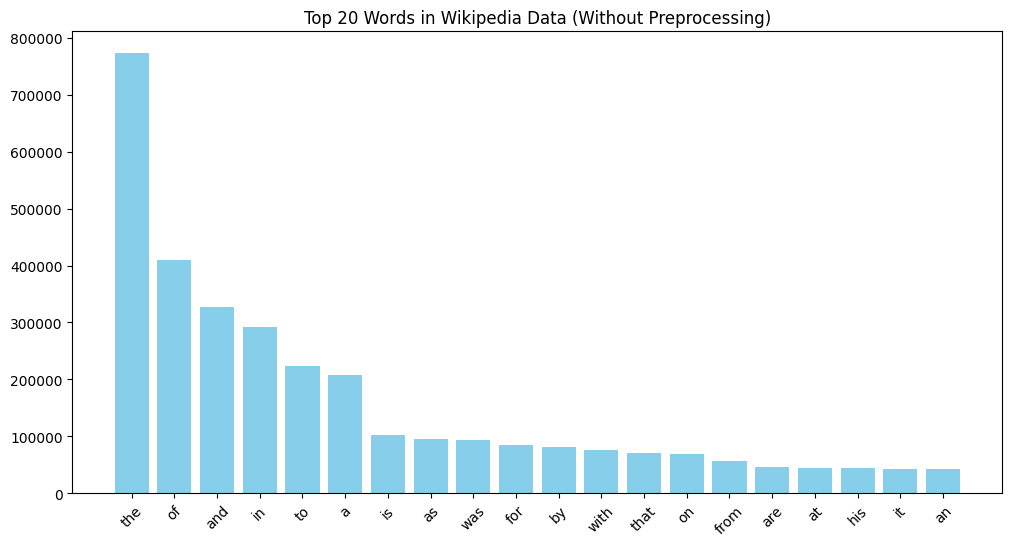

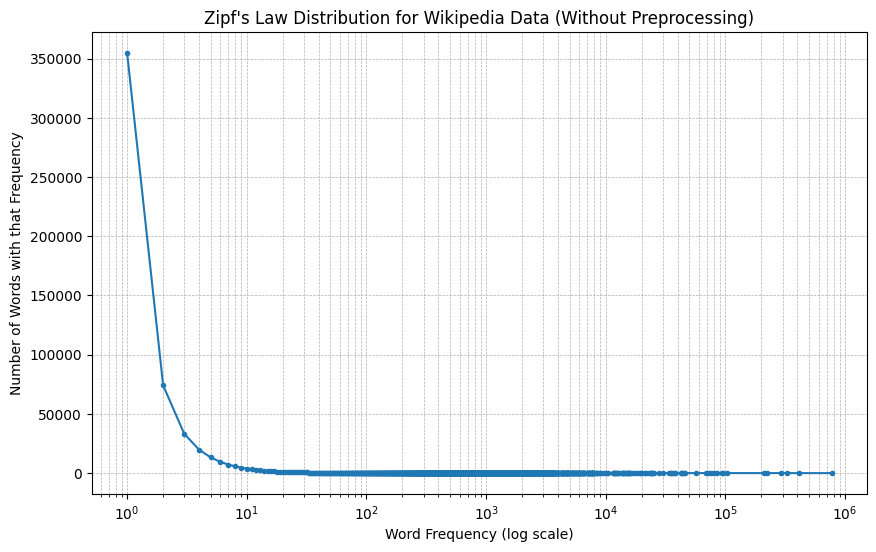


Preprocessing Wikipedia Data...
Top 20 processed tokens for Wikipedia Data:
[('use', 30979), ('also', 28867), ('one', 23820), ('first', 22646), ('state', 21511), ('includ', 19124), ('year', 18946), ('american', 18890), ('time', 17466), ('new', 17376), ('two', 17156), ('unit', 13783), ('world', 13335), ('may', 13195), ('citi', 12806), ('centuri', 12758), ('work', 12032), ('mani', 12027), ('name', 11837), ('gener', 11622)]


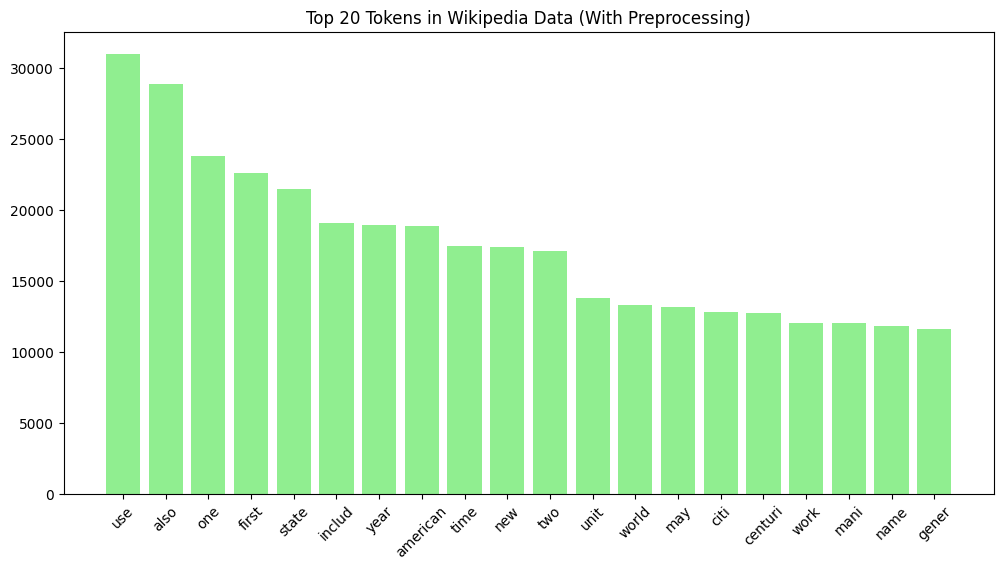

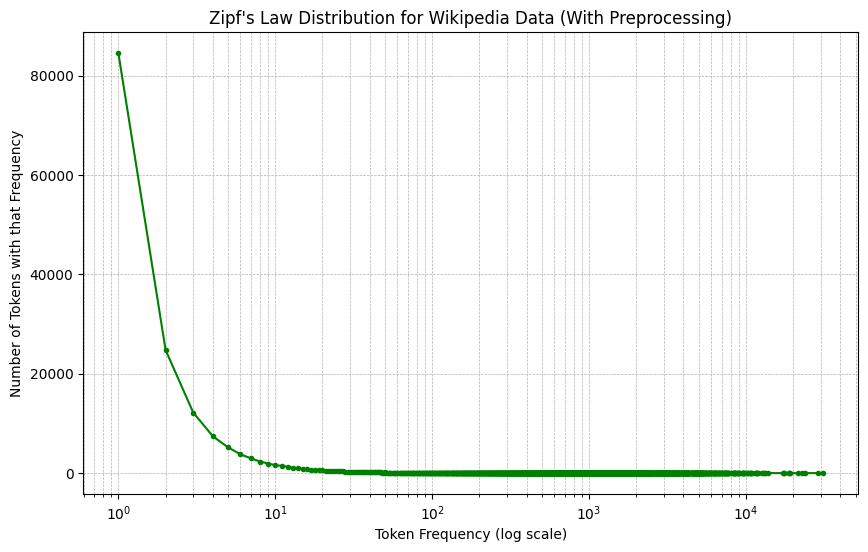

--------------------------------------------------
--- Analyzing Corpus: News Data ---
Top 20 raw words for News Data:
[('the', 120411), ('to', 61657), ('and', 57324), ('of', 52876), ('a', 49685), ('in', 46793), ('for', 20958), ('on', 20612), ('that', 19579), ('was', 18134), ('with', 16109), ('is', 15633), ('at', 11707), ('as', 11018), ('by', 10979), ('from', 10427), ('he', 10177), ('are', 8644), ('this', 8500), ('have', 8292)]


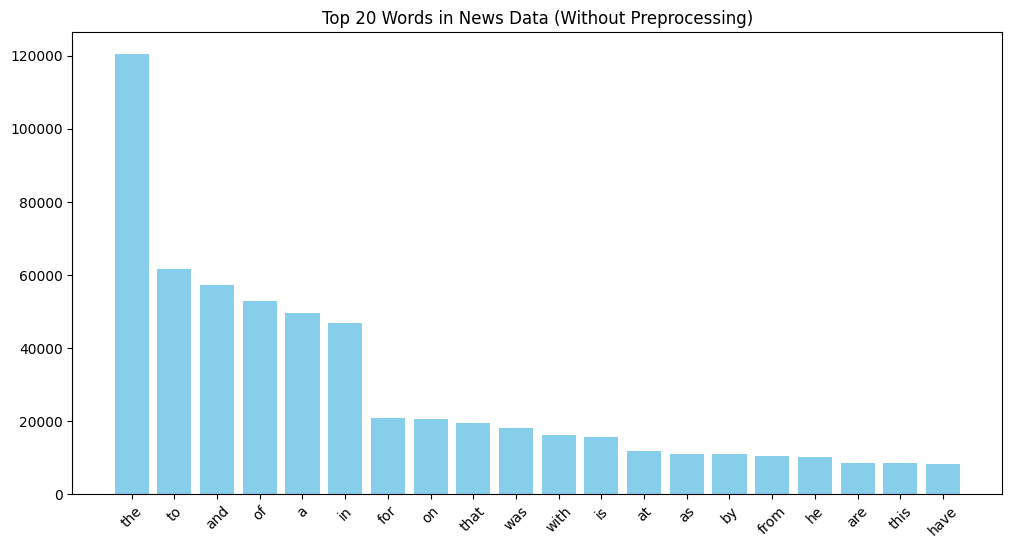

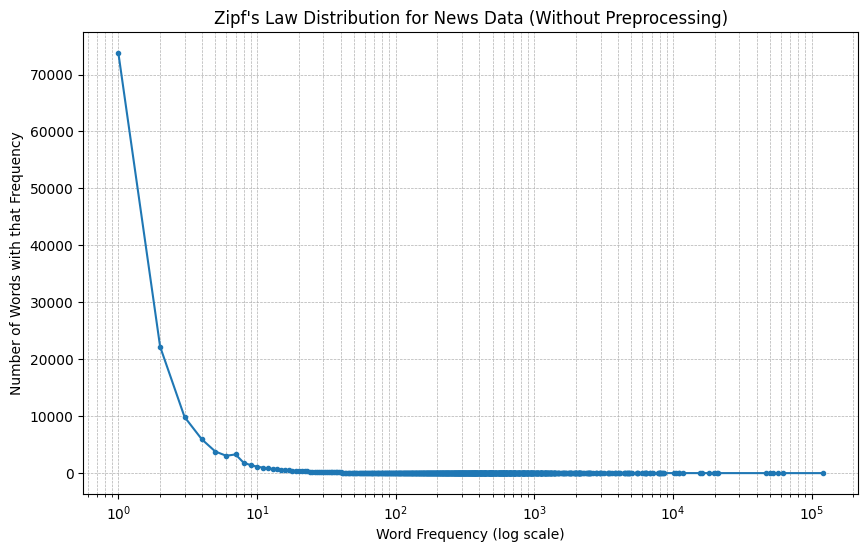


Preprocessing News Data...
Top 20 processed tokens for News Data:
[('said', 14241), ('year', 7983), ('polic', 6366), ('news', 5394), ('peopl', 4662), ('also', 4651), ('one', 4535), ('offic', 4421), ('new', 4332), ('state', 4323), ('report', 4033), ('say', 3920), ('time', 3883), ('day', 3759), ('two', 3713), ('famili', 3703), ('help', 3558), ('court', 3337), ('case', 3043), ('home', 2982)]


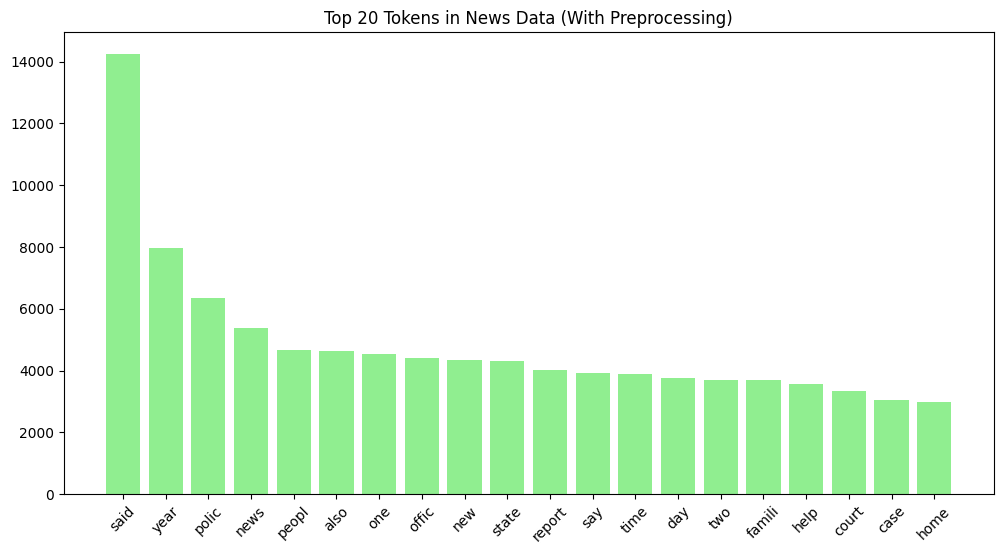

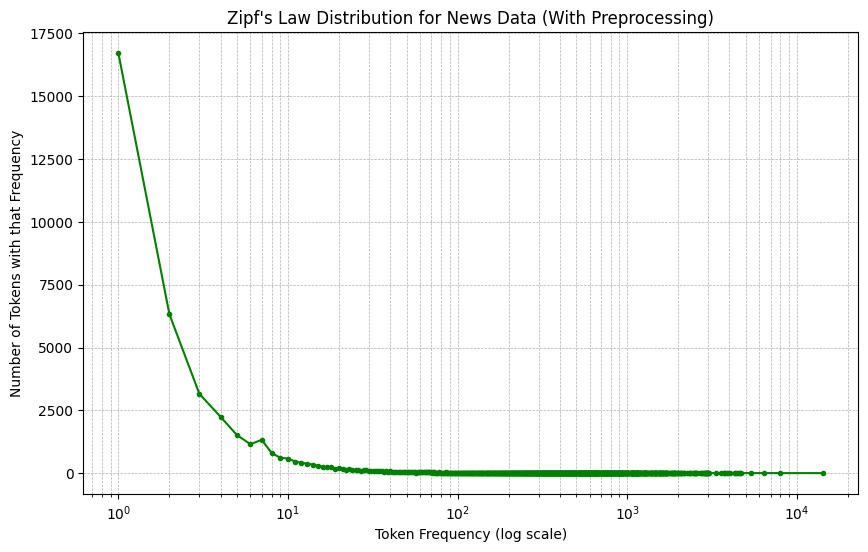

--------------------------------------------------

--- Generating Combined Analysis ---
--- Analyzing Corpus: Combined Data ---
Top 20 raw words for Combined Data:
[('the', 892782), ('of', 462707), ('and', 385308), ('in', 338977), ('to', 285052), ('a', 257773), ('is', 118630), ('was', 112362), ('as', 105885), ('for', 105177), ('by', 91689), ('with', 91628), ('that', 90696), ('on', 89830), ('from', 66939), ('at', 57063), ('are', 54861), ('his', 51512), ('it', 51189), ('an', 50405)]


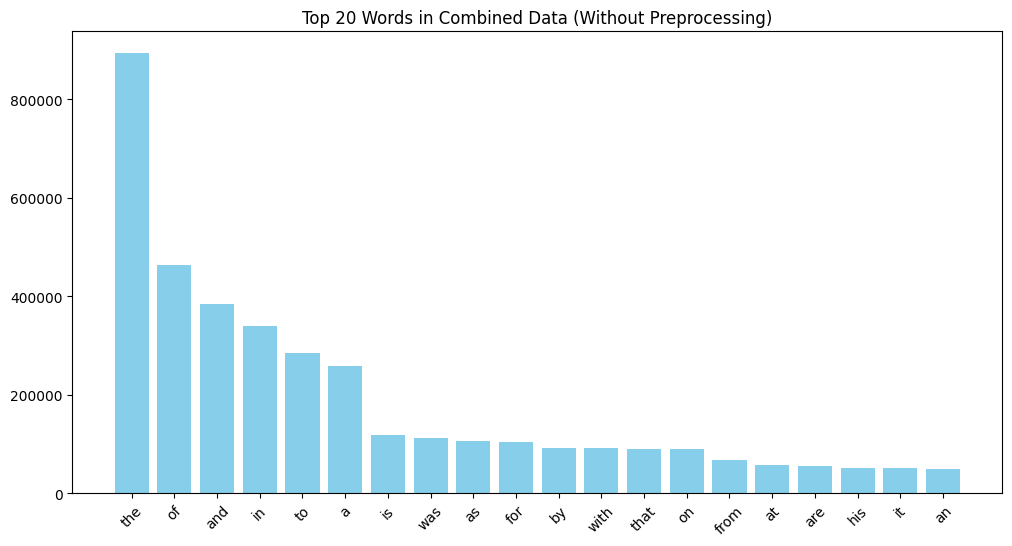

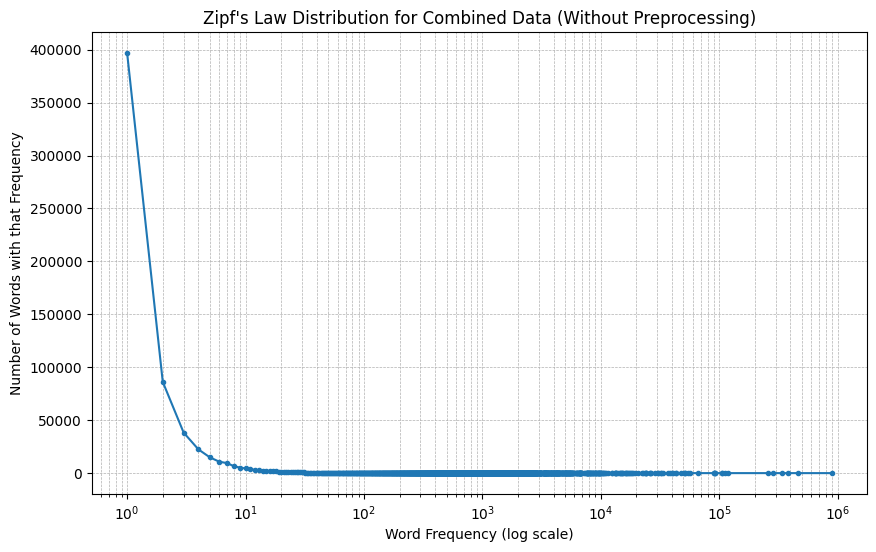


Preprocessing Combined Data...
Top 20 processed tokens for Combined Data:
[('use', 33948), ('also', 33518), ('one', 28355), ('year', 26929), ('state', 25834), ('first', 25566), ('includ', 22098), ('new', 21708), ('time', 21349), ('two', 20869), ('american', 19624), ('said', 17799), ('citi', 15763), ('peopl', 15434), ('may', 15361), ('unit', 15110), ('work', 14866), ('world', 14383), ('would', 14331), ('mani', 13481)]


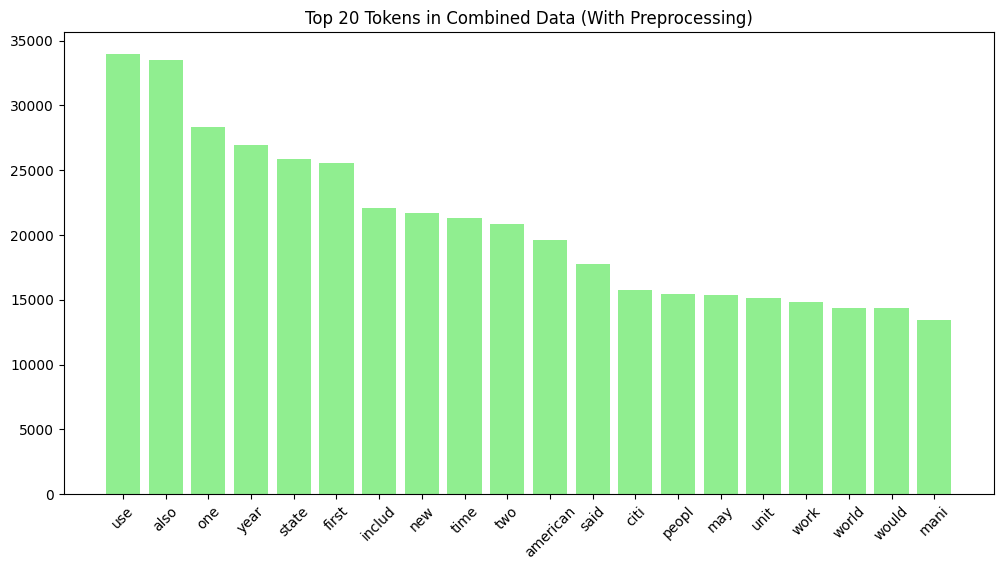

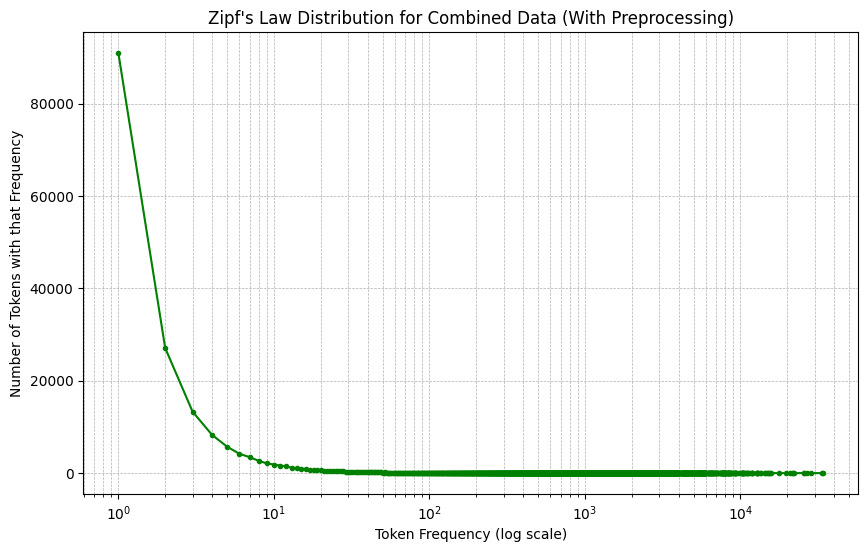

--------------------------------------------------


: 

In [ ]:
# --- Recommended: Separate Analysis ---
analyze_and_plot("Wikipedia Data", wiki_corpus)
analyze_and_plot("News Data", news_corpus)

# --- Optional: Combined Analysis ---
# You can uncomment these lines if you also want to see the combined plot
print("\n--- Generating Combined Analysis ---")
combined_corpus = wiki_corpus + " " + news_corpus
analyze_and_plot("Combined Data", combined_corpus)